# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [8]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

apples = 60
oranges = 40 
total_fruits = apples + oranges


q = (apples / total_fruits)
p = (oranges / total_fruits)

print(f'The probability that the fruit is an apple is: {round(q, 3)}')
print(f'The probability that the fruit is an orange is: {round(p, 3)}')


The probability that the fruit is an apple is: 0.6
The probability that the fruit is an orange is: 0.4


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [12]:
# What is the probability that the first 5 fruits are all apples?

# Calculate probabilities
prob_all_apples = p**5
prob_all_apples_and_oranges = (p**5) * (q**15)

# Print results
print(f"The probability that the first 5 fruits are all apples is: {round(prob_all_apples, 3)}")
print(f"The probability that the first 5 fruits are all apples and the next 15 fruits are all oranges is: {round(prob_all_apples_and_oranges, 9)}")


The probability that the first 5 fruits are all apples is: 0.01
The probability that the first 5 fruits are all apples and the next 15 fruits are all oranges is: 4.815e-06


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [14]:
from math import comb

p = 0.6  # Probability of an apple
q = 0.4  # Probability of an orange

n = 20  # Total fruits
k = 5   # Number of apples

# Binomial probability calculation
binomial_coefficient = comb(n, k)
prob_exactly_5_apples = binomial_coefficient * (p**k) * (q**(n - k))

# Print result
print(f"The probability that the sample contains exactly 5 apples and 15 oranges is: {round(prob_exactly_5_apples, 3)}")


The probability that the sample contains exactly 5 apples and 15 oranges is: 0.001


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

* $(P(\text{less than 5 apples}) = P(k < 5) = \sum_{k=0}^{4} \binom{n}{k} \cdot p^k \cdot q^{n-k})$

Where:

* $(n = 20)$: Total number of trials (fruits picked),
* $(p = 0.6)$: Probability of picking an apple,
* $(q = 1 - p = 0.4)$: Probability of picking an orange.

In [17]:
from scipy.stats import binom

# Parameters
n = 20  # Total fruits
p = 0.6  # Probability of an apple

# Calculate CDF for k = 4
prob_less_than_5_apples = binom.cdf(4, n, p)

# Print result
print(f"The probability that less than 5 fruits are apples is: {round(prob_less_than_5_apples, 6)}")


The probability that less than 5 fruits are apples is: 0.000317


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

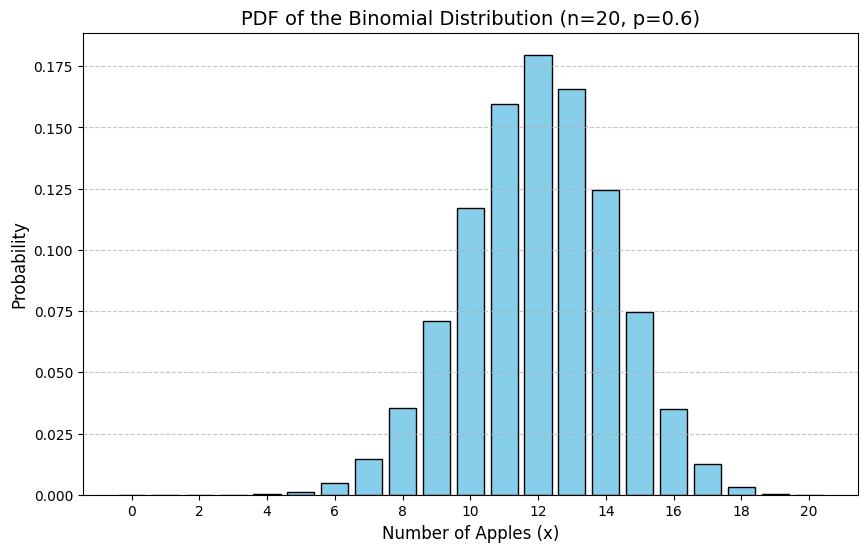

In [18]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

n = 20  # Total trials (fruits picked)
p = 0.6  # Probability of picking an apple

# Range of possible outcomes (0 to n)
x = np.arange(0, n + 1)

# Probability Mass Function (PMF) for each outcome
pmf_values = binom.pmf(x, n, p)

# Plotting the PDF
plt.figure(figsize=(10, 6))
plt.bar(x, pmf_values, color="skyblue", edgecolor="black")
plt.title("PDF of the Binomial Distribution (n=20, p=0.6)", fontsize=14)
plt.xlabel("Number of Apples (x)", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.xticks(range(0, n + 1, 2))  # Tick every 2 outcomes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [20]:
import math

lambda_value = 2.3  # Average number of goals
k = 5  # Number of goals

# Poisson probability calculation
poisson_probability = (lambda_value**k * math.exp(-lambda_value)) / math.factorial(k)

# Print result
print(f"The probability that the number of goals scored in a match is 5: {round(poisson_probability, 3)}")


The probability that the number of goals scored in a match is 5: 0.054


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

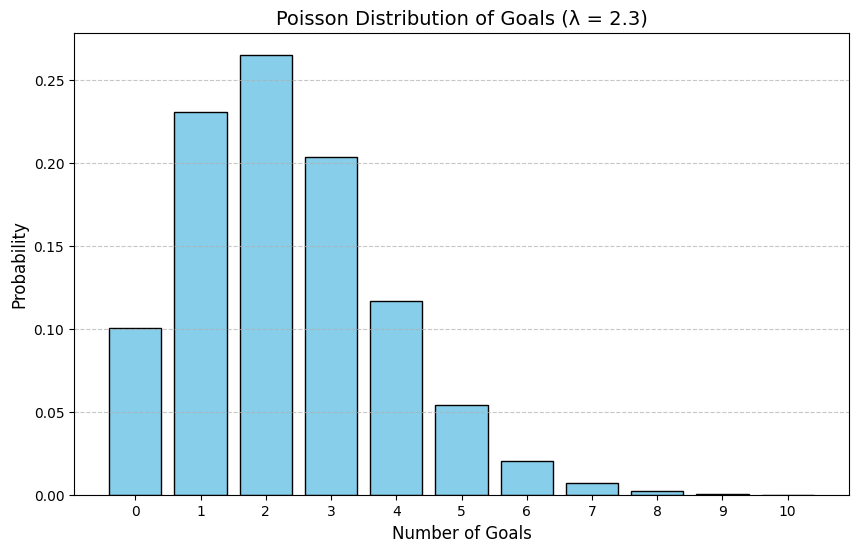

In [22]:
import math

# Parameters
lambda_value = 2.3  # Average number of goals
k_values = np.arange(0, 11)  # Number of goals from 0 to 10

# Calculate Poisson probabilities
poisson_probabilities = [
    (lambda_value**k * math.exp(-lambda_value)) / math.factorial(k) for k in k_values
]

# Plotting the Poisson distribution
plt.figure(figsize=(10, 6))
plt.bar(k_values, poisson_probabilities, color="skyblue", edgecolor="black")
plt.title("Poisson Distribution of Goals (λ = 2.3)", fontsize=14)
plt.xlabel("Number of Goals", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.xticks(k_values)  # Set x-ticks from 0 to 10
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
